# Цель работы
Ознакомиться с методами частотного анализа из библиотеки MLxtend
# Ход работы
## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('dataset_group.csv', header=None, names=['date', 'transaction_id', 'item'])
all_data

,date,transaction_id,item
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


Список всех id

In [3]:
unique_id = all_data.transaction_id.unique()
print('Количество транзакций:', len(unique_id))

Количество транзакций: 1139


Список товаров

In [4]:
items = all_data.item.unique()
print('Количество товаров:', len(items))

Количество товаров: 38


Списки товаров для каждого покупателя

In [5]:
dataset = [[elem for elem in all_data[all_data.transaction_id == id].item if elem in items] for id in unique_id]

## Подготовка данных

In [6]:
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


Данные преобрзованы с помощью TransactionEncoder в датасет, который представляет собой бинарную матрицу размера 1139x38. Строки - идентификаторы транзакций (покупатели), столбцы - элементы (товары), на пересечении - покупал ли пользователь данный товар. 

## Ассоциативный анализ с использованием алгоритма Apriori

1) Получены часто встречающиеся наборы товаров с минимальным уровнем поддержки 0.3. Это значит, что данные наборы товаров покупали не менее 30% покупателей. Минимальный размер набора товаров - 1, максимальный - 2.

In [7]:
results = apriori(df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


2) Для минимального уровня поддержки 0.3 получены наборы, состоящие только из одного товара.

In [8]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


3) Для минимального уровня поддержки 0.3 получены наборы, состоящие только из двух товаров.

In [9]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ', len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (cereals, vegetables)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (dishwashing liquid/detergent, vegetables)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (ice cream, vegetables)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (poultry, vegetables)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (yogurt, vegetables)       2

Count of result itemstes

4) Построена зависимость количества наборов от уровня поддержки. Красными точками отмечены уровни поддержки, при которых перестают генерироваться наборы размера 4, 3, 2, 1.

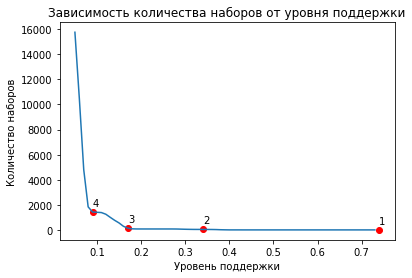

In [10]:
min_supports = np.arange(0.05, 1, 0.01)
items_set_count = np.array([])
max_len = -1
for min_support in min_supports:
    results = apriori(df, min_support=min_support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    max_len_curr = np.max(results['length'])
    if (max_len == -1):
        max_len = max_len_curr
    if (max_len != max_len_curr):
        plt.scatter(min_support, len(results), c='r')
        plt.text(min_support, len(results) + 500, str(max_len))
        max_len = max_len_curr
    if (np.isnan(max_len_curr)):
        break
    items_set_count = np.append(items_set_count, len(results))

plt.plot(min_supports[:len(items_set_count)], items_set_count)
plt.title('Зависимость количества наборов от уровня поддержки')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.show()


5) Построен датасет только из тех элементов, которые попадают в наборы размером 1, при уровне поддержки 0.38.

In [11]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data.transaction_id == id].item if elem in new_items] for id in unique_id]
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


6) Полученный датасет приведен к необходимому для работы формату.

In [12]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


7) Проведен ассоциативный анализ при уровне поддержки 0.3 для нового датасета. В результате отсутствуют продукты (и их наборы), чей уровень поддержки был меньше, чем 0.38. Результат данного ассоциативного анализа входит в результат анализа для исходного датасета.

In [13]:
results = apriori(new_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


8) Проведен ассоциативный анализ при уровне поддержки 0.15 для нового датасета. Выведены все наборы, размер которых больше 1 и в которых есть 'yogurt' или 'waffles'.

In [14]:
results = apriori(new_df, min_support=0.15, use_colnames=True)
results['cond'] = results['itemsets'].apply(lambda iset: len(iset) > 1 and ('yogurt' in iset or 'waffles' in iset))
results = results[results['cond']]
del results['cond']
print(results)
print('\nCount of result itemstes = ', len(results))

      support                                 itemsets
27   0.169447                 (waffles, aluminum foil)
28   0.177349                  (yogurt, aluminum foil)
40   0.159789                        (waffles, bagels)
41   0.162423                         (yogurt, bagels)
52   0.160667                       (cereals, waffles)
53   0.172081                        (cereals, yogurt)
63   0.172959                       (waffles, cheeses)
64   0.172081                        (yogurt, cheeses)
73   0.169447                  (waffles, dinner rolls)
74   0.166813                   (yogurt, dinner rolls)
82   0.175593  (dishwashing liquid/detergent, waffles)
83   0.158033   (dishwashing liquid/detergent, yogurt)
90   0.169447                          (waffles, eggs)
91   0.174715                           (yogurt, eggs)
97   0.172959                     (waffles, ice cream)
98   0.156277                      (yogurt, ice cream)
103  0.184372                    (waffles, lunch meat)
104  0.161

9) Построен датасет, из тех элементов, которые не попали в датасет из п. 6. Датасет приведен к удобному для анализа виду.

In [15]:
diff_items = set(list(df)) - set(list(new_df))
diff_dataset = [[elem for elem in all_data[all_data.transaction_id == id].item if elem in diff_items] for id in unique_id]
te = TransactionEncoder()
te_ary = te.fit_transform(diff_dataset)
diff_df = pd.DataFrame(te_ary, columns=te.columns_)
diff_df

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


10) Проведен ассоциативный анализ при уровне поддержки 0.3 для нового датасета (diff_df).

In [16]:
results = apriori(diff_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


11) Написано правило для вывода всех наборов, в которых хотя бы два элемента начинаются на 's'.

In [20]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['itemsets'].apply(lambda iset: len([item for item in iset if item.startswith('s')]) >= 2)]
results

,support,itemsets
675,0.137840,"(sandwich loaves, sandwich bags)"
676,0.146620,"(shampoo, sandwich bags)"
677,0.158911,"(soap, sandwich bags)"
678,0.162423,"(soda, sandwich bags)"
679,0.147498,"(spaghetti sauce, sandwich bags)"
680,0.131694,"(sugar, sandwich bags)"
686,0.150132,"(shampoo, sandwich loaves)"
687,0.158033,"(sandwich loaves, soap)"
688,0.141352,"(sandwich loaves, soda)"
689,0.150132,"(spaghetti sauce, sandwich loaves)"


12) Написано правило для вывода всех наборов, для которых уровень поддержки изменяется от 0.1 до 0.25.

In [30]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['support'].apply(lambda sup: sup > 0.1 and sup < 0.25)]
results

,support,itemsets
38,0.157155,"(all- purpose, aluminum foil)"
39,0.150132,"(all- purpose, bagels)"
40,0.144864,"(all- purpose, beef)"
41,0.147498,"(all- purpose, butter)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(toilet paper, waffles, vegetables)"
1402,0.130817,"(toilet paper, yogurt, vegetables)"
1403,0.121159,"(vegetables, waffles, tortillas)"
1404,0.130817,"(vegetables, yogurt, tortillas)"


# Выводы
В ходе лабораторной работы изучены методы частотного анализа из библиотеки MLxtend: метод Apriori позволяет выделить частовстречающиеся наборы элементов для заданного минимального уровня поддержки. Увеличение уровня поддержки в первую очередь уменьшает количество наборов большей длины.